# Citibike data

Citibike makes the data available as a csv file for each month. Here we will use data from July through December 2013. 

(To reproduce the analysis **you can skip this section** and start with the pickled pandas dataFrame in the next section).

Download required files from Citibike's website [here](http://www.citibikenyc.com/system-data) and read data.

In [20]:
import pandas as pd

jul = pd.read_csv('Data/2013-07-CitiBiketripdata.csv')
aug = pd.read_csv('Data/2013-08-CitiBiketripdata.csv')
sep = pd.read_csv('Data/2013-09-CitiBiketripdata.csv')
oct = pd.read_csv('Data/2013-10-CitiBiketripdata.csv')
nov = pd.read_csv('Data/2013-11-CitiBiketripdata.csv')
dec = pd.read_csv('Data/2013-12-CitiBiketripdata.csv')

Merge data from all months to create a single dataFrame.

In [21]:
data = [jul, aug, sep, oct, nov, dec]
df = pd.concat(data)

Pickle final dataFrame.

In [22]:
file_name = 'citibike_July-Aug2013.pkl'
df.to_pickle(file_name)

## Brief exploratory analysis


In [23]:
import pandas as pd
import numpy as np
from datetime import time
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

Load pickled dataFrame (pkl can be downloaded from [here](https://www.dropbox.com/s/m92e69sfleex0zj/citibike_July-Aug2013.pkl?dl=0)).

(Skip this if you loaded data in previous section)

In [4]:
file_name = 'citibike_July-Aug2013.pkl'
%time df = pd.read_pickle(file_name)

CPU times: user 24.7 s, sys: 2.17 s, total: 26.8 s
Wall time: 29.8 s


In [25]:
df.shape

(5037185, 15)

In [26]:
df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                  object
gender                       int64
dtype: object

In [27]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,\N,0
1,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,\N,0
2,178,2013-07-01 00:01:04,2013-07-01 00:04:02,293,Lafayette St & E 8 St,40.730287,-73.990765,237,E 11 St & 2 Ave,40.730473,-73.986724,14548,Subscriber,1980,2
3,1580,2013-07-01 00:01:06,2013-07-01 00:27:26,531,Forsyth St & Broome St,40.718939,-73.992663,499,Broadway & W 60 St,40.769155,-73.981918,16063,Customer,\N,0
4,757,2013-07-01 00:01:10,2013-07-01 00:13:47,382,University Pl & E 14 St,40.734927,-73.992005,410,Suffolk St & Stanton St,40.720664,-73.985180,19213,Subscriber,1986,1


How many citibike stations are there:

In [28]:
df['start station id'].unique().shape

(330,)

And how many different bikes:

In [29]:
df['bikeid'].unique().shape

(6503,)

In [30]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,5037185.000000,5037185.000000,5037185.000000,5037185.000000,5037185.000000,5037185.000000,5037185.000000,5037185.000000,5037185.000000
mean,887.638411,439.431707,40.734333,-73.991048,439.742451,40.734023,-73.991151,17650.751773,1.072951
std,3826.185719,343.173266,0.019921,0.012426,348.042293,0.019944,0.012520,1731.694085,0.576649
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,0.000000
25%,405.000000,304.000000,40.720434,-74.000165,303.000000,40.720196,-74.000271,16155.000000,1.000000
50%,648.000000,402.000000,40.736197,-73.990765,402.000000,40.735439,-73.990931,17653.000000,1.000000
75%,1067.000000,485.000000,40.750200,-73.981948,484.000000,40.749718,-73.981948,19128.000000,1.000000
max,6250750.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,21333.000000,2.000000


Median trip duration is (suprisingly) short:

In [31]:
df.tripduration.median()/60

10.8

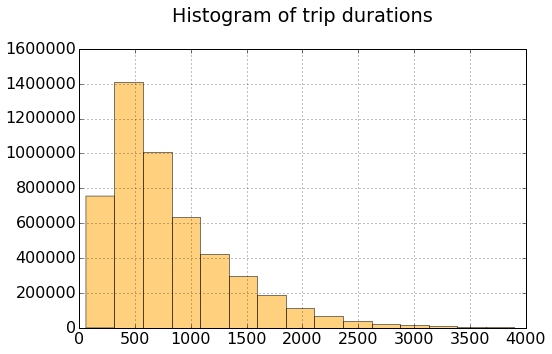

In [32]:
plt.rcParams.update({'font.size': 16})
df[(df['tripduration']/60 < 65)][['tripduration']].hist(figsize=(8,5),
                                                        bins=15, alpha=0.5, color='orange')
plt.title('Histogram of trip durations\n')

## Define time stamps
Convert starttime and stoptime to "datetime" data type.

Index dataFrame by starttime.

In [33]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])
df.index = pd.to_datetime(df['starttime'])

In [34]:
df.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                         object
gender                              int64
dtype: object

In [35]:
df.head(n=2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,,
2013-07-01 00:00:00,634,2013-07-01 00:00:00,2013-07-01 00:10:34,164,E 47 St & 2 Ave,40.753231,-73.970325,504,1 Ave & E 15 St,40.732219,-73.981656,16950,Customer,\N,0
2013-07-01 00:00:02,1547,2013-07-01 00:00:02,2013-07-01 00:25:49,388,W 26 St & 10 Ave,40.749718,-74.002950,459,W 20 St & 11 Ave,40.746745,-74.007756,19816,Customer,\N,0


## Distribution of number of trips

### Daily variation

Resample data daily over the whole time series and plot data
(using pandas' timestamp-specific method "resample")

In [36]:
countsPerDay = df.starttime.resample('D', how=['count'])

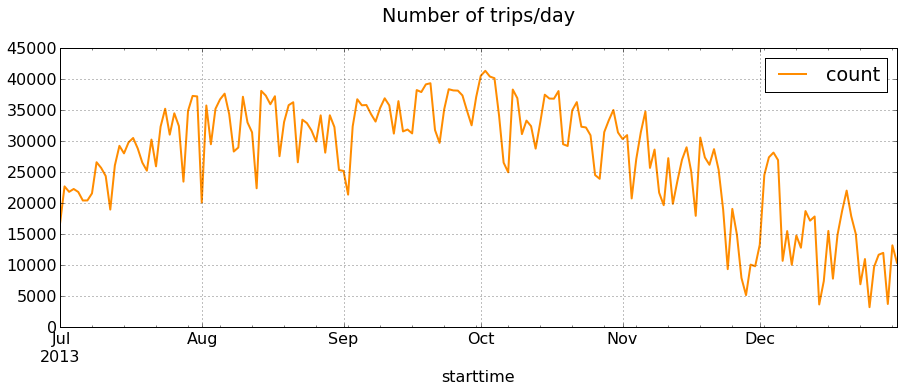

In [37]:
countsPerDay.plot(figsize=(15,5), color='DarkOrange', linewidth=2)
plt.title('Number of trips/day\n')

### Hourly variation: July 1st and July 4th

Resample data hourly for the two dates.

In [38]:
july1 = df['2013-7-1'].starttime.resample('H', how=['count'])
july4 = df['2013-7-4'].starttime.resample('H', how=['count'])

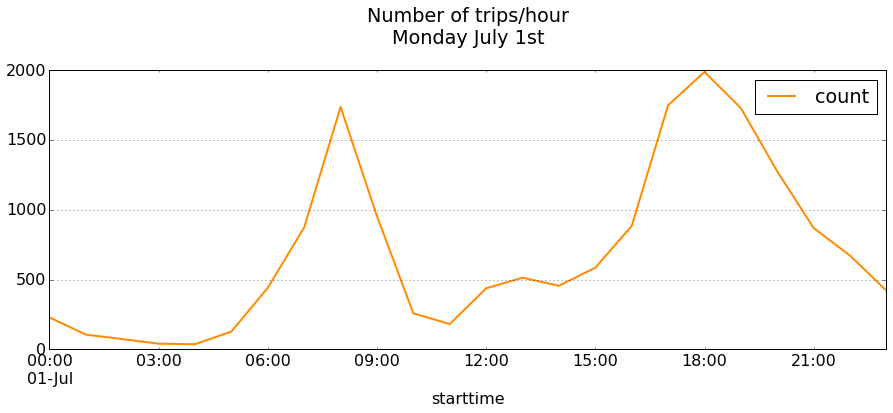

In [39]:
july1.plot(figsize=(15,5), color='DarkOrange', linewidth=2)
plt.title('Number of trips/hour\nMonday July 1st\n')

Resample data hourly for the two dates using pandas timestamp-specific method "resample".

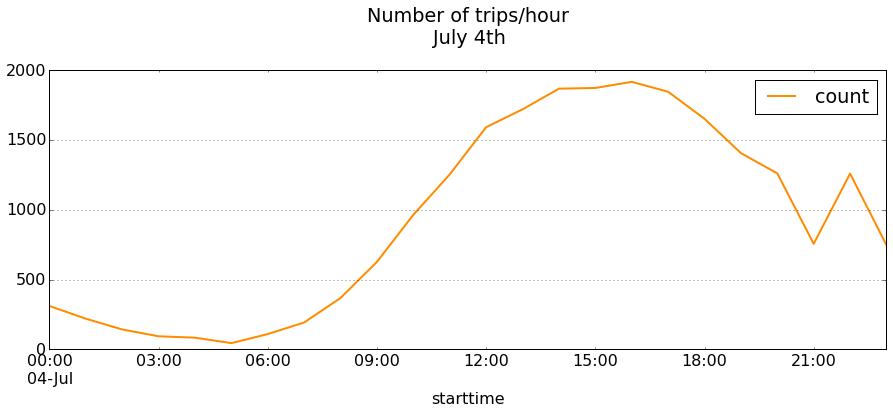

In [40]:
july4.plot(figsize=(15,5), color='DarkOrange', linewidth=2)
plt.title('Number of trips/hour\nJuly 4th\n')

Not surprisingly, the commutter pattern of citibike use disappears in the holiday.

### Number of trips per station

Get only start station id and coordinates. Then drop duplicates.

In [41]:
dfToPlot = df.iloc[:,[3,5,6]]
dfToPlot.index = dfToPlot['start station id']

In [42]:
dfToPlot = dfToPlot.drop_duplicates()
dfToPlot.shape

(330, 3)

Calculate total counts per individual station and add to new dataFrame.

In [43]:
count = df.groupby('start station id')['start station id'].count()
dfToPlot['count'] = count
dfToPlot.head()

,start station id,start station latitude,start station longitude,count
start station id,,,,
164,164,40.753231,-73.970325,14019
388,388,40.749718,-74.002950,22391
293,293,40.730287,-73.990765,46734
531,531,40.718939,-73.992663,17574
382,382,40.734927,-73.992005,36571


### Mapping station use

Since my experience with [Vincent](http://vincent.readthedocs.org/en/latest/) was not very good and Enrico was more successful, I used [Folium](http://folium.readthedocs.org/en/latest/) as well.

(Do not forget to add "http:" to the links in the html file header)

**First test:** circle size reflecting relative use of stations as trip starting points over the whole six month period.

In [44]:
import folium

map_citibike = folium.Map(location=[40.74, -73.99],
                          width=1000, height = 1000, tiles = 'Stamen Toner', zoom_start=12)

for index, row in dfToPlot.iterrows():
    map_citibike.circle_marker(location=[row['start station latitude'],
                                         row['start station longitude']], 
#                               popup=row['start station id'],
# Tehese datasets do not contain station name; maybe get them from later csv 
                               radius=row['count']/250, fill_color='#FFC266', line_color='#FF9900')
    
map_citibike.create_map(path='map_citibike.html')

#del map_citibike


In [45]:
from IPython.display import IFrame
IFrame('map_citibike.html', width=1000, height=1000)